In [1]:
# ============================================================================
# DATA EXPLORATION: Road Traffic Crashes 2012-2023
# ============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

%matplotlib inline

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', None)

# Set plotting style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 10)

print("="*80)
print("ROAD TRAFFIC CRASHES 2012-2023: DATA EXPLORATION")
print("="*80)
print(f"Analysis Date: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print("="*80)

ROAD TRAFFIC CRASHES 2012-2023: DATA EXPLORATION
Analysis Date: 2026-01-27 15:25:08


In [2]:
# ========== LOAD DATASETS ==========

print("\n Loading datasets...")

# Dataset 1: Algorithm-coded (2012-2023)
crashes_algo = pd.read_csv(r'D:\Nairobi-Accident-Severity\data\raw\ma3route_crashes_2012_2023\ma3route_crashes_algorithmcode.csv')

# Dataset 2: Manual-coded (2017-2018) 
crashes_manual = pd.read_csv(r'D:\Nairobi-Accident-Severity\data\raw\ma3route_crashes_2012_2023\ma3route_crashes_manualcode.csv')

print("✅ Datasets loaded successfully!")


 Loading datasets...
✅ Datasets loaded successfully!


In [3]:

# ========== BASIC DATASET INFO ==========

print("\n" + "="*80)
print("DATASET 1: ALGORITHM-CODED CRASHES (2012-2023)")
print("="*80)

print(f"\n Dataset Shape: {crashes_algo.shape}")
print(f"   - Rows (crashes): {crashes_algo.shape[0]:,}")
print(f"   - Columns (variables): {crashes_algo.shape[1]}")

print(f"\n Column Names:")
for i, col in enumerate(crashes_algo.columns, 1):
    print(f"   {i}. {col}")

print(f"\n Data Types:")
print(crashes_algo.dtypes)

print(f"\n First 10 Rows:")
print(crashes_algo.head(10))

print(f"\n Basic Statistics:")
print(crashes_algo.describe())


DATASET 1: ALGORITHM-CODED CRASHES (2012-2023)

 Dataset Shape: (31064, 10)
   - Rows (crashes): 31,064
   - Columns (variables): 10

 Column Names:
   1. crash_id
   2. crash_datetime
   3. crash_date
   4. latitude
   5. longitude
   6. n_crash_reports
   7. contains_fatality_words
   8. contains_pedestrian_words
   9. contains_matatu_words
   10. contains_motorcycle_words

 Data Types:
crash_id                       int64
crash_datetime                object
crash_date                    object
latitude                     float64
longitude                    float64
n_crash_reports                int64
contains_fatality_words        int64
contains_pedestrian_words      int64
contains_matatu_words          int64
contains_motorcycle_words      int64
dtype: object

 First 10 Rows:
   crash_id       crash_datetime  crash_date  latitude  longitude  \
0         1  2018-06-06 20:39:54  2018-06-06 -1.263030  36.764374   
1         2  2018-08-17 06:15:54  2018-08-17 -0.829710  37.037820   

In [4]:
# ========== MISSING VALUES ANALYSIS ==========

print("\n" + "="*80)
print("MISSING VALUES ANALYSIS")
print("="*80)

missing_data = pd.DataFrame({
    'Column': crashes_algo.columns,
    'Missing_Count': crashes_algo.isnull().sum(),
    'Missing_Percent': (crashes_algo.isnull().sum() / len(crashes_algo) * 100).round(2)
})
missing_data = missing_data[missing_data['Missing_Count'] > 0].sort_values('Missing_Percent', ascending=False)

if len(missing_data) > 0:
    print("\n Columns with missing values:")
    print(missing_data.to_string(index=False))
else:
    print("\n✅ No missing values found!")


MISSING VALUES ANALYSIS

✅ No missing values found!


In [5]:
# ========== TEMPORAL ANALYSIS ==========

print("\n" + "="*80)
print("TEMPORAL ANALYSIS")
print("="*80)

# Parse dates
crashes_algo['crash_datetime'] = pd.to_datetime(crashes_algo['crash_datetime'])
crashes_algo['crash_date'] = pd.to_datetime(crashes_algo['crash_date'])

print(f"\n Date Range:")
print(f"   Earliest crash: {crashes_algo['crash_date'].min()}")
print(f"   Latest crash: {crashes_algo['crash_date'].max()}")
print(f"   Duration: {(crashes_algo['crash_date'].max() - crashes_algo['crash_date'].min()).days} days")
print(f"   Duration: {(crashes_algo['crash_date'].max() - crashes_algo['crash_date'].min()).days / 365.25:.1f} years")

# Extract time features
crashes_algo['year'] = crashes_algo['crash_date'].dt.year
crashes_algo['month'] = crashes_algo['crash_date'].dt.month
crashes_algo['day_of_week'] = crashes_algo['crash_date'].dt.day_name()
crashes_algo['hour'] = crashes_algo['crash_datetime'].dt.hour

print(f"\n Crashes by Year:")
yearly_crashes = crashes_algo['year'].value_counts().sort_index()
for year, count in yearly_crashes.items():
    print(f"   {year}: {count:,} crashes")


TEMPORAL ANALYSIS

 Date Range:
   Earliest crash: 2012-08-08 00:00:00
   Latest crash: 2023-07-12 00:00:00
   Duration: 3990 days
   Duration: 10.9 years

 Crashes by Year:
   2012: 310 crashes
   2013: 1,398 crashes
   2014: 4,014 crashes
   2015: 6,101 crashes
   2016: 4,219 crashes
   2017: 2,698 crashes
   2018: 3,194 crashes
   2019: 2,739 crashes
   2020: 1,928 crashes
   2021: 1,937 crashes
   2022: 1,805 crashes
   2023: 721 crashes


In [6]:
# ========== GPS COVERAGE ANALYSIS ==========

print("\n" + "="*80)
print("GPS COVERAGE ANALYSIS")
print("="*80)

has_gps = crashes_algo[['latitude', 'longitude']].notna().all(axis=1)
print(f"\n GPS Coordinates:")
print(f"   With GPS: {has_gps.sum():,} ({has_gps.mean()*100:.1f}%)")
print(f"   Without GPS: {(~has_gps).sum():,} ({(~has_gps).mean()*100:.1f}%)")

if has_gps.sum() > 0:
    print(f"\n Geographic Bounds:")
    print(f"   Latitude range: {crashes_algo['latitude'].min():.4f} to {crashes_algo['latitude'].max():.4f}")
    print(f"   Longitude range: {crashes_algo['longitude'].min():.4f} to {crashes_algo['longitude'].max():.4f}")


GPS COVERAGE ANALYSIS

 GPS Coordinates:
   With GPS: 31,064 (100.0%)
   Without GPS: 0 (0.0%)

 Geographic Bounds:
   Latitude range: -3.1000 to -0.5654
   Longitude range: 36.2840 to 37.8795


In [7]:
# ========== SEVERITY INDICATORS ANALYSIS ==========

print("\n" + "="*80)
print("SEVERITY INDICATORS ANALYSIS")
print("="*80)

print("\n🚨 Fatality Indicator:")
fatal_count = crashes_algo['contains_fatality_words'].sum()
fatal_pct = crashes_algo['contains_fatality_words'].mean() * 100
print(f"   Crashes with fatality keywords: {fatal_count:,} ({fatal_pct:.2f}%)")

print("\n🚶 Pedestrian Involvement:")
ped_count = crashes_algo['contains_pedestrian_words'].sum()
ped_pct = crashes_algo['contains_pedestrian_words'].mean() * 100
print(f"   Crashes involving pedestrians: {ped_count:,} ({ped_pct:.2f}%)")

print("\n🚐 Matatu (Public Transport) Involvement:")
matatu_count = crashes_algo['contains_matatu_words'].sum()
matatu_pct = crashes_algo['contains_matatu_words'].mean() * 100
print(f"   Crashes involving matatus: {matatu_count:,} ({matatu_pct:.2f}%)")

print("\n🏍️ Motorcycle Involvement:")
moto_count = crashes_algo['contains_motorcycle_words'].sum()
moto_pct = crashes_algo['contains_motorcycle_words'].mean() * 100
print(f"   Crashes involving motorcycles: {moto_count:,} ({moto_pct:.2f}%)")


SEVERITY INDICATORS ANALYSIS

🚨 Fatality Indicator:
   Crashes with fatality keywords: 2,284 (7.35%)

🚶 Pedestrian Involvement:
   Crashes involving pedestrians: 944 (3.04%)

🚐 Matatu (Public Transport) Involvement:
   Crashes involving matatus: 2,541 (8.18%)

🏍️ Motorcycle Involvement:
   Crashes involving motorcycles: 1,142 (3.68%)


In [8]:
# ========== SEVERITY CLASSIFICATION ==========

print("\n" + "="*80)
print("CREATING SEVERITY CLASSIFICATION")
print("="*80)

def classify_severity(row):
    """
    Classify crash severity based on keyword indicators:
    - FATAL: Contains death-related keywords (dead, died, killed, fatal, body)
    - SEVERE: Involves vulnerable road users (pedestrians, motorcycles)
    - MODERATE: Involves public transport (matatus)
    - MINOR: None of the above
    """
    if row['contains_fatality_words'] == 1:
        return 'FATAL'
    elif row['contains_pedestrian_words'] == 1 or row['contains_motorcycle_words'] == 1:
        return 'SEVERE'
    elif row['contains_matatu_words'] == 1:
        return 'MODERATE'
    else:
        return 'MINOR'

crashes_algo['severity'] = crashes_algo.apply(classify_severity, axis=1)

print("\n Severity classification created!")

print("\n Severity Distribution:")
severity_counts = crashes_algo['severity'].value_counts()
for severity, count in severity_counts.items():
    pct = (count / len(crashes_algo)) * 100
    print(f"   {severity}: {count:,} ({pct:.2f}%)")


CREATING SEVERITY CLASSIFICATION

 Severity classification created!

 Severity Distribution:
   MINOR: 25,059 (80.67%)
   FATAL: 2,284 (7.35%)
   MODERATE: 2,121 (6.83%)
   SEVERE: 1,600 (5.15%)


In [9]:
# ========== CRASH REPORTS PER INCIDENT ==========

print("\n" + "="*80)
print("CRASH REPORTS PER INCIDENT ANALYSIS")
print("="*80)

print("\n Number of reports per crash:")
print(crashes_algo['n_crash_reports'].describe())

print("\n Distribution:")
report_dist = crashes_algo['n_crash_reports'].value_counts().head(10).sort_index()
for n_reports, count in report_dist.items():
    print(f"   {n_reports} report(s): {count:,} crashes")


CRASH REPORTS PER INCIDENT ANALYSIS

 Number of reports per crash:
count    31064.000000
mean         1.400914
std          1.486540
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         66.000000
Name: n_crash_reports, dtype: float64

 Distribution:
   1 report(s): 25,252 crashes
   2 report(s): 3,551 crashes
   3 report(s): 1,047 crashes
   4 report(s): 445 crashes
   5 report(s): 241 crashes
   6 report(s): 163 crashes
   7 report(s): 89 crashes
   8 report(s): 86 crashes
   9 report(s): 40 crashes
   11 report(s): 24 crashes


In [10]:
# ========== GPS COVERAGE BY SEVERITY ==========

print("\n" + "="*80)
print("GPS COVERAGE BY SEVERITY")
print("="*80)

for severity in ['FATAL', 'SEVERE', 'MODERATE', 'MINOR']:
    severity_df = crashes_algo[crashes_algo['severity'] == severity]
    has_gps_severity = severity_df[['latitude', 'longitude']].notna().all(axis=1)
    print(f"\n{severity}:")
    print(f"   Total crashes: {len(severity_df):,}")
    print(f"   With GPS: {has_gps_severity.sum():,} ({has_gps_severity.mean()*100:.1f}%)")

print("\n" + "="*80)
print("✅ DATA EXPLORATION COMPLETE")
print("="*80)
print(f"\n Summary:")
print(f"   - Total crashes: {len(crashes_algo):,}")
print(f"   - Date range: {crashes_algo['year'].min()} - {crashes_algo['year'].max()}")
print(f"   - GPS coverage: {has_gps.mean()*100:.1f}%")
print(f"   - Severity classes: {crashes_algo['severity'].nunique()}")
print(f"   - Fatal crashes: {(crashes_algo['severity']=='FATAL').sum():,}")
print(f"   - Severe crashes: {(crashes_algo['severity']=='SEVERE').sum():,}")
print(f"   - Moderate crashes: {(crashes_algo['severity']=='MODERATE').sum():,}")
print(f"   - Minor crashes: {(crashes_algo['severity']=='MINOR').sum():,}")


GPS COVERAGE BY SEVERITY

FATAL:
   Total crashes: 2,284
   With GPS: 2,284 (100.0%)

SEVERE:
   Total crashes: 1,600
   With GPS: 1,600 (100.0%)

MODERATE:
   Total crashes: 2,121
   With GPS: 2,121 (100.0%)

MINOR:
   Total crashes: 25,059
   With GPS: 25,059 (100.0%)

✅ DATA EXPLORATION COMPLETE

 Summary:
   - Total crashes: 31,064
   - Date range: 2012 - 2023
   - GPS coverage: 100.0%
   - Severity classes: 4
   - Fatal crashes: 2,284
   - Severe crashes: 1,600
   - Moderate crashes: 2,121
   - Minor crashes: 25,059


CREATING VISUALIZATIONS

 Visualizations saved to: reports/figures/02_new_dataset_exploration.png


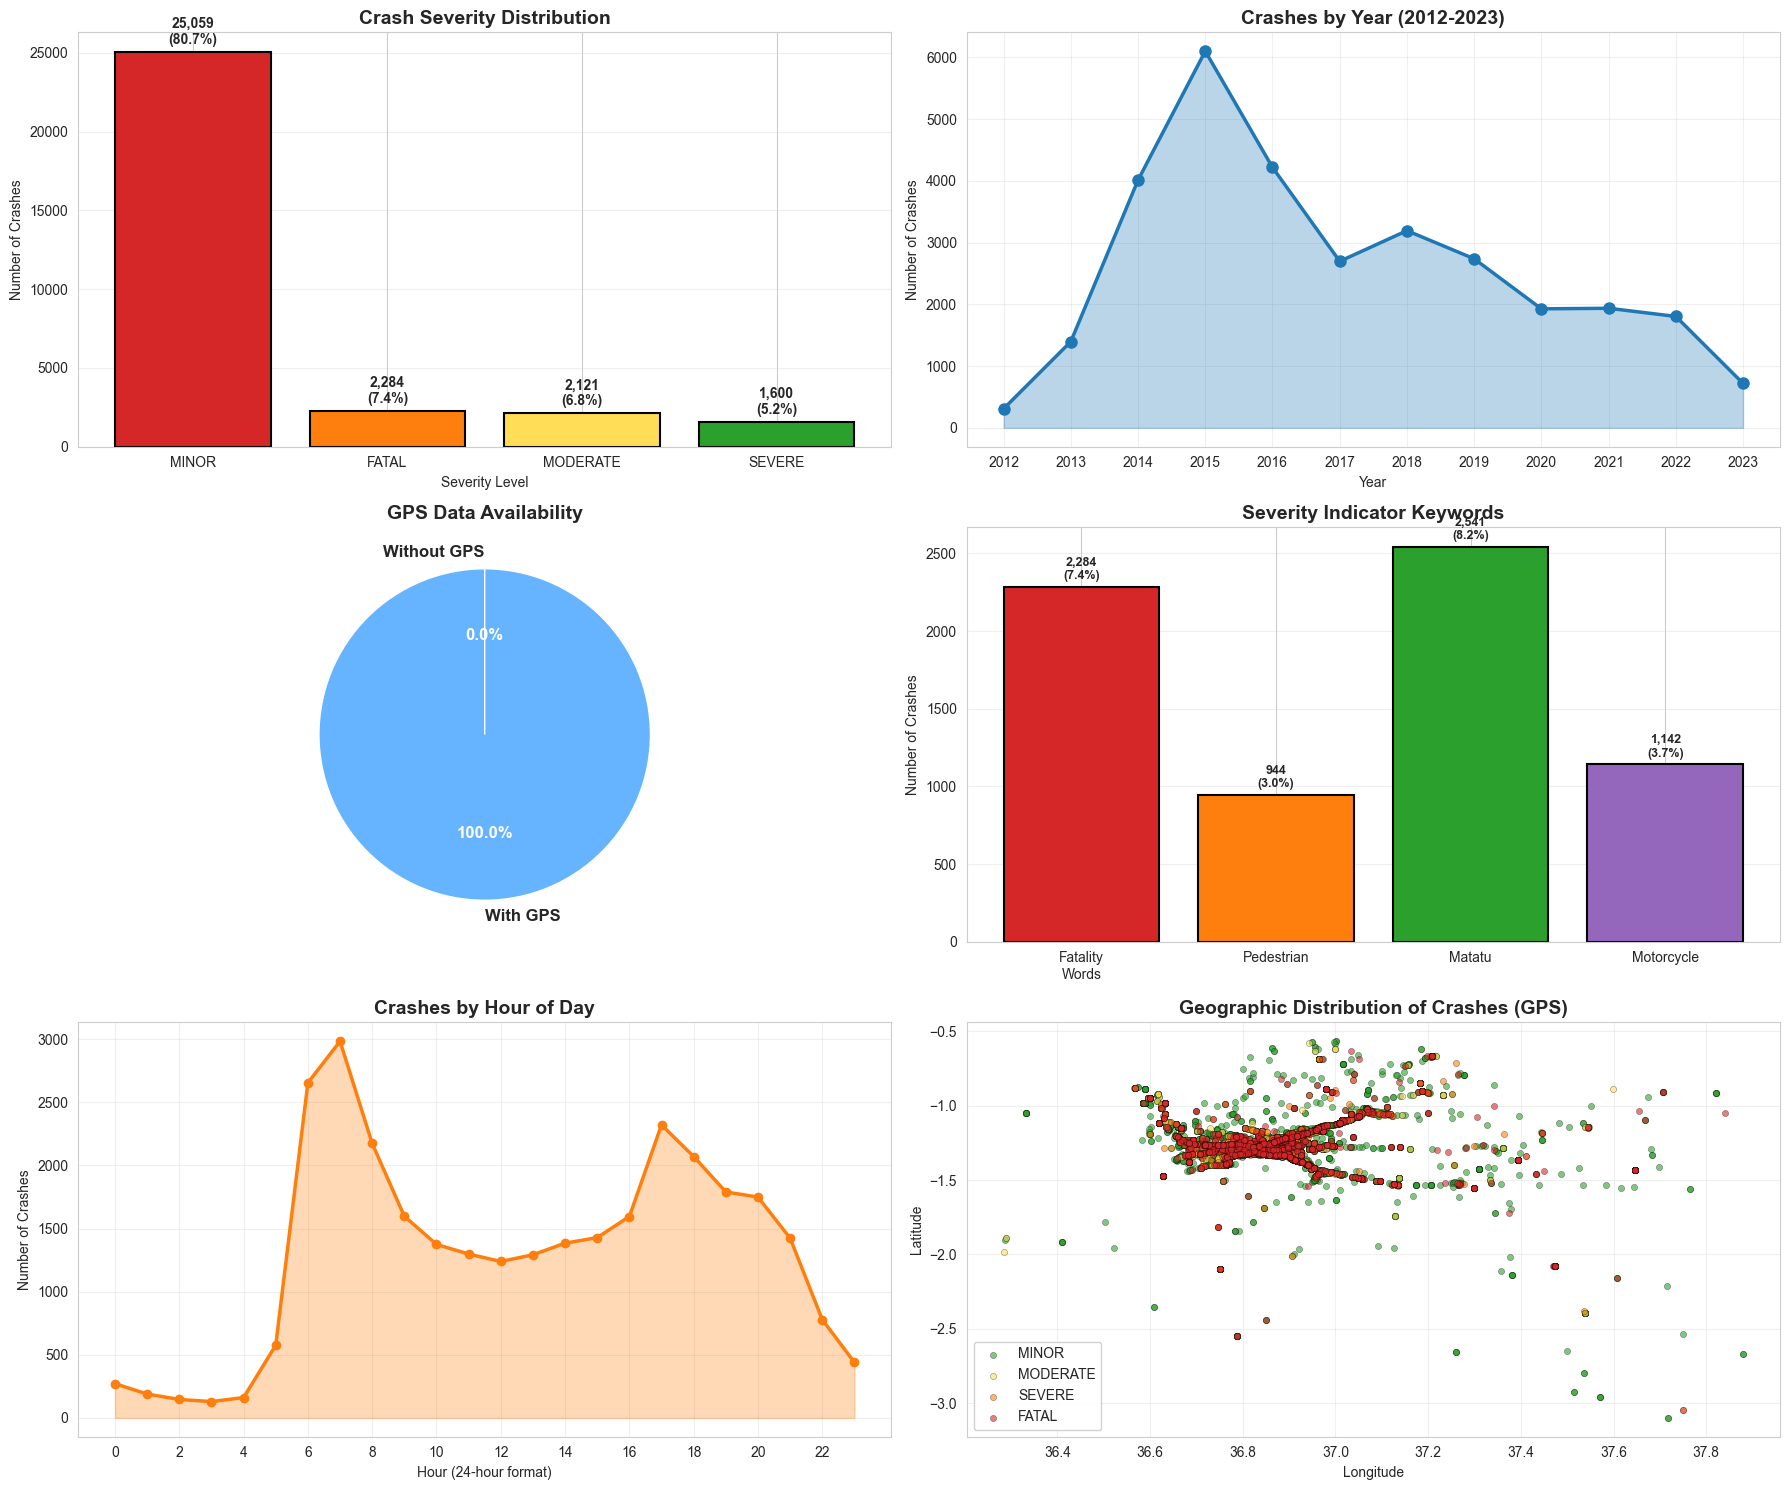


 VISUALIZATION COMPLETE!


In [15]:
# ============================================================================
# VISUALIZATIONS
# ============================================================================

print("="*80)
print("CREATING VISUALIZATIONS")
print("="*80)

fig, axes = plt.subplots(3, 2, figsize=(18, 15))

# ========== PLOT 1: Severity Distribution ==========
severity_counts = crashes_algo['severity'].value_counts()
colors_severity = ['#d62728', '#ff7f0e', '#ffdd57', '#2ca02c']
axes[0,0].bar(severity_counts.index, severity_counts.values, color=colors_severity, edgecolor='black', linewidth=1.5)
axes[0,0].set_title('Crash Severity Distribution', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Severity Level')
axes[0,0].set_ylabel('Number of Crashes')
axes[0,0].grid(axis='y', alpha=0.3)

# Add counts on bars
for i, (severity, count) in enumerate(severity_counts.items()):
    axes[0,0].text(i, count + 500, f'{count:,}\n({count/len(crashes_algo)*100:.1f}%)', 
                   ha='center', fontweight='bold', fontsize=10)

# ========== PLOT 2: Crashes by Year ==========
yearly_crashes = crashes_algo['year'].value_counts().sort_index()
axes[0,1].plot(yearly_crashes.index, yearly_crashes.values, marker='o', linewidth=2.5, 
               markersize=8, color='#1f77b4')
axes[0,1].fill_between(yearly_crashes.index, yearly_crashes.values, alpha=0.3, color='#1f77b4')
axes[0,1].set_title('Crashes by Year (2012-2023)', fontsize=14, fontweight='bold')
axes[0,1].set_xlabel('Year')
axes[0,1].set_ylabel('Number of Crashes')
axes[0,1].grid(True, alpha=0.3)
axes[0,1].set_xticks(yearly_crashes.index)

# ========== PLOT 3: GPS Coverage ==========
gps_data = pd.DataFrame({
    'Category': ['With GPS', 'Without GPS'],
    'Count': [has_gps.sum(), (~has_gps).sum()]
})
colors_gps = ['#66b3ff', '#ff9999']
wedges, texts, autotexts = axes[1,0].pie(gps_data['Count'], labels=gps_data['Category'], 
                                           autopct='%1.1f%%', colors=colors_gps, startangle=90,
                                           textprops={'fontsize': 12, 'fontweight': 'bold'})
axes[1,0].set_title('GPS Data Availability', fontsize=14, fontweight='bold')
for autotext in autotexts:
    autotext.set_color('white')

# ========== PLOT 4: Severity Indicators Comparison ==========
indicators = ['Fatality\nWords', 'Pedestrian', 'Matatu', 'Motorcycle']
counts = [
    crashes_algo['contains_fatality_words'].sum(),
    crashes_algo['contains_pedestrian_words'].sum(),
    crashes_algo['contains_matatu_words'].sum(),
    crashes_algo['contains_motorcycle_words'].sum()
]
colors_indicators = ['#d62728', '#ff7f0e', '#2ca02c', '#9467bd']
axes[1,1].bar(indicators, counts, color=colors_indicators, edgecolor='black', linewidth=1.5)
axes[1,1].set_title('Severity Indicator Keywords', fontsize=14, fontweight='bold')
axes[1,1].set_ylabel('Number of Crashes')
axes[1,1].grid(axis='y', alpha=0.3)

# Add counts on bars
for i, count in enumerate(counts):
    pct = (count / len(crashes_algo)) * 100
    axes[1,1].text(i, count + 50, f'{count:,}\n({pct:.1f}%)', ha='center', 
                   fontweight='bold', fontsize=9)

# ========== PLOT 5: Crashes by Hour ==========
hourly_crashes = crashes_algo['hour'].value_counts().sort_index()
axes[2,0].plot(hourly_crashes.index, hourly_crashes.values, marker='o', linewidth=2.5,
               markersize=6, color='#ff7f0e')
axes[2,0].fill_between(hourly_crashes.index, hourly_crashes.values, alpha=0.3, color='#ff7f0e')
axes[2,0].set_title('Crashes by Hour of Day', fontsize=14, fontweight='bold')
axes[2,0].set_xlabel('Hour (24-hour format)')
axes[2,0].set_ylabel('Number of Crashes')
axes[2,0].set_xticks(range(0, 24, 2))
axes[2,0].grid(True, alpha=0.3)

# ========== PLOT 6: Geographic Scatter ==========
gps_crashes = crashes_algo.dropna(subset=['latitude', 'longitude'])
severity_colors = {'FATAL': '#d62728', 'SEVERE': '#ff7f0e', 'MODERATE': '#ffdd57', 'MINOR': '#2ca02c'}

for severity in ['MINOR', 'MODERATE', 'SEVERE', 'FATAL']:  # Plot in this order for layering
    severity_data = gps_crashes[gps_crashes['severity'] == severity]
    axes[2,1].scatter(severity_data['longitude'], severity_data['latitude'], 
                     c=severity_colors[severity], alpha=0.6, s=20, label=severity, 
                     edgecolors='black', linewidth=0.3)

axes[2,1].set_title('Geographic Distribution of Crashes (GPS)', fontsize=14, fontweight='bold')
axes[2,1].set_xlabel('Longitude')
axes[2,1].set_ylabel('Latitude')
axes[2,1].legend(loc='best', framealpha=0.9)
axes[2,1].grid(True, alpha=0.3)

plt.tight_layout()

# Save the figure
import os
os.makedirs(r'D:\Nairobi-Accident-Severity\reports\figures', exist_ok=True)
plt.savefig(r'D:\Nairobi-Accident-Severity\reports\figures\02_new_dataset_exploration.png', 
            dpi=300, bbox_inches='tight')
print("\n Visualizations saved to: reports/figures/02_new_dataset_exploration.png")

plt.show()

print("\n" + "="*80)
print(" VISUALIZATION COMPLETE!")
print("="*80)